# **Activity 2: Introduction to NLP basic techniques**



**Instructions:**

---
* Please download the provided IPython Notebook (ipynb) file and open it in Google Colab. Once opened, enter your code in the same file directly beneath the relevant question's code block.


* Purpose of this activity is to practice and get hands on experience (Ungraded Activity)  


# Fundamentals of NLP: Tokenization


Natural language processing (NLP) has made substantial advances in the past few years due to the success of [modern techniques](https://nlpoverview.com/) that are based on [deep learning](https://en.wikipedia.org/wiki/Deep_learning). With the rise of the popularity of NLP and the availability of different forms of large-scale data, it is now even more imperative to understand the inner workings of NLP techniques and concepts, from first principles, as they find their way into real-world usage and applications that affect society at large. Building intuitions and having a solid grasp of concepts are both important for coming up with innovative techniques, improving research, and building safe, human-centered AI and NLP technologies.

In this first chapter, which is part of a series called **Fundamentals of NLP**, we will learn about some of the most important **basic concepts** that power NLP techniques used for research and building real-world applications. Some of these techniques include *lemmatization*, *stemming*, *tokenization*, and *sentence segmentation*. These are all important techniques to train efficient and effective NLP models. Along the way, we will also cover best practices and common mistakes to avoid when training and building NLP models. We also provide some exercises for you to keep practicing and exploring some ideas.


In every chapter, we will introduce the theoretical aspect and motivation of each concept covered. Then we will obtain hands-on experience by using bootstrap methods, industry-standard tools, and other open-source libraries to implement the different techniques. Along the way, we will also cover best practices, share important references, point out common mistakes to avoid when training and building NLP models, and discuss what lies ahead.

---

## Tokenization

Below I am showing you an example of a simple tokenizer without following any standards. All it does is extract tokens based on a white space seperator.

Try to running the following code blocks.

In [2]:
doc = "I love coding and writing"
for i, w in enumerate(doc.split(" ")):#enumerate() is used to iterate over a sequence while keeping track of both the index and corresponding value
    print("Token " + str(i) + ": " + w)

Token 0: I
Token 1: love
Token 2: coding
Token 3: and
Token 4: writing


All the code does is separate the sentence into individual tokens. The above simple block of code works well on the text I have provided. But typically, text is a lot noisier and complex than the example I used. For instance, if I used the word "so-called" is that one word or two words? For such scenarios, you may need more advanced approaches for tokenization. You can consider stripping away the "-" and splitting into two tokens or just combining into one token but this all depends on the problem and domain you are working on.

Another problem with our simple algorithm is that it cannot deal with extra whitespaces in the text. In addition, how do we deal with cities like "New York" and "San Francisco"?


---
**Question 1**: Copy the code from above and add extra whitespaces to the string value assigned to the `doc` variable and identify the issue with the code. Then try to fix the issue. Hint: Use `text.strip()` to fix the problem.

In Natural Language Processing (NLP), the strip() function is commonly used for preprocessing text data. This function is part of Python's string methods and is primarily used to remove leading and trailing whitespace (including spaces, tabs, and newline characters) from a string. It's particularly useful for cleaning raw text data before applying further transformations or analysis.

In [4]:
#Adding extra whitespaces
doc = "   I love   coding and   writing   "
for i, w in enumerate(doc.split(" ")):  # enumerate() is used to iterate over a sequence while keeping track of both the index and corresponding value
    print("Token " + str(i) + ": " + w)

print("\n--- Fixed Code ---")

#Fixed code using strip() to remove extra whitespaces
doc = "   I love   coding and   writing   "
for i, w in enumerate(doc.strip().split()):  # strip() removes leading/trailing spaces, split() handles multiple spaces
    print("Token " + str(i) + ": " + w)

Token 0: 
Token 1: 
Token 2: 
Token 3: I
Token 4: love
Token 5: 
Token 6: 
Token 7: coding
Token 8: and
Token 9: 
Token 10: 
Token 11: writing
Token 12: 
Token 13: 
Token 14: 

--- Fixed Code ---
Token 0: I
Token 1: love
Token 2: coding
Token 3: and
Token 4: writing


The code first demonstrates an issue where extra spaces in the string doc lead to empty tokens when splitting by spaces. It then shows the corrected version, where strip() removes leading and trailing spaces, and split() automatically handles multiple spaces between words, providing the desired output without empty tokens.

---

**spaCy**: spaCy is an open-source Python library for natural language processing (NLP). It provides tools to efficiently process and analyze text data, offering features like tokenization, part-of-speech tagging, named entity recognition, and more. Known for its speed and accuracy, spaCy is widely used in NLP tasks for extracting insights and information from text.

In [ ]:
## required libraries that need to be installed
%%capture
!pip install -U spacy
#!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm

**en_core_web_sm** is a small-sized pre-trained language model provided by the spaCy library for Natural Language Processing (NLP). It is designed for tasks like tokenization, part-of-speech tagging, dependency parsing, named entity recognition (NER), and more. Being a small model, it's fast and lightweight, making it suitable for applications where computational resources are limited or real-time performance is crucial.

In [ ]:
## import the libraries
import spacy #opensource lib used for tokenization,lemmatization and provides pre trained models
## load the pre trained language model
nlp = spacy.load("en_core_web_sm") #"en" indicates English, "core" suggests that it's a core language model, "web" refers to the source of the training data, and "sm" stands for "small"

## tokenization
doc = nlp("This is the so-called lemmatization")
for token in doc:
    print(token.text)

This
is
the
so
-
called
lemmatization


The code imports the spacy library and loads the pre-trained English language model en_core_web_sm. It then tokenizes the sentence "This is the so-called lemmatization" using the model, and iterates through the tokens, printing each word individually. This demonstrates how Spacy performs tokenization.

---
**NLTK** (Natural Language Toolkit) is a Python library that provides tools and resources for working with human language data, enabling tasks like text processing, analysis, and understanding. It's widely used for various natural language processing tasks, offering functions for tasks like tokenization, part-of-speech tagging, and more

In [6]:
import nltk
nltk.download('punkt_tab')#Punkt is a pre-trained sentence tokenizer provided by NLTK that can intelligently split text into individual sentences
from nltk.tokenize import word_tokenize #word_tokenize function is used to split a piece of text into individual words or tokens
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

The code imports the nltk library and downloads the necessary pre-trained tokenizer data. It then uses the word_tokenize() function from NLTK to split the sentence "At eight o'clock on Thursday morning Arthur didn't feel very good." into individual tokens (words). The resulting list of tokens is stored in the tokens variable.

**Question 2**: Copy the code from above and extend  the code to print tokens from the given sentence that have a length greater than 5?

In [7]:
import nltk
nltk.download('punkt')  # Punkt is a pre-trained sentence tokenizer provided by NLTK that can intelligently split text into individual sentences
from nltk.tokenize import word_tokenize  # word_tokenize function is used to split a piece of text into individual words or tokens

sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)

# Print tokens with length greater than 5
long_tokens = [token for token in tokens if len(token) > 5]
print(long_tokens)

["o'clock", 'Thursday', 'morning', 'Arthur']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The code begins by importing the nltk library and downloading the punkt tokenizer data, which is necessary for breaking down sentences into words. It uses the word_tokenize() function to split the given sentence into individual tokens (words and punctuation marks).

Next, a list comprehension is used to filter the tokens, keeping only those whose length is greater than 5 characters. The filtered tokens are stored in the long_tokens list, which is then printed. This allows us to extract and view the words that are longer than 5 characters from the original sentence.

---
**Gensim** is a Python library designed for topic modeling and document similarity analysis. It specializes in handling large text corpora efficiently. Gensim provides tools for tasks like topic modeling, word embedding, and document similarity calculation. It's widely used for uncovering hidden patterns in text data and generating insights from unstructured text.

In summary, Gensim is a powerful library in the field of natural language processing (NLP) that focuses on tasks related to text analysis and modeling, such as extracting topics from documents and creating word embeddings.

In [ ]:
#genism work tokenization
!pip install gensim
from gensim.utils import tokenize
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed
liquid-fuel launch vehicle to orbit the Earth."""
list(tokenize(text))

['Founded',
 'in',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 'SpaceX',
 's',
 'Falcon',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

The code installs the gensim library and imports the tokenize function from gensim.utils to tokenize a given text. The tokenize() function splits the input text into individual words, and the result is converted into a list and displayed, which shows the tokenized words without punctuation.

**Q 3**. Now based on above word tokenizations perform a **sentence** tokenization using spacy or nltk?

In [9]:
import spacy

# Load the pre-trained English model
nlp = spacy.load("en_core_web_sm")

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""

# Process the text using Spacy
doc = nlp(text)

# Perform sentence tokenization
sentences = [sent.text for sent in doc.sents]
print(sentences)

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars.', 'In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth.']


The code uses Spacy's pre-trained English model (en_core_web_sm) to process the input text. It then performs sentence tokenization by iterating over the doc.sents attribute, which detects sentence boundaries, and extracts each sentence as a string. The sentences are stored in a list and printed.

**BeautifulSoup**: Beautiful Soup is a Python library used for web scraping. It helps extract data from HTML and XML documents by providing methods to parse and navigate their content. Beautiful Soup simplifies the process of extracting information from web pages, making it accessible for various data collection and analysis tasks.

In [ ]:
#code block 1
#import the required libraries

from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

First, we will grab a web page content then we will analyze the text to see what the page is about.
We will use the urllib module to crawl the web page:

In [ ]:
#code block 2

import urllib.request

#open and read the spacex data
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="icon" type="image/svg+xml" sizes="any" href="https://www.php.net/favicon.svg?v=2">\n <link rel="icon" type="image/png" sizes="196x196" href="https://www.php.net/favicon-196x196.png?v=2">\n <link rel="icon" type="image/png" sizes="32x32" href="https://www.php.net/favicon-32x32.png?v=2">\n <link rel="icon" type="image/png" sizes="16x16" href="https://www.php.net/favicon-16x16.png?v=2">\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico?v=2">\n\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type=

As you can see from the printed output, the result contains a lot of HTML tags that need to be
cleaned. We can use BeautifulSoup to clean the grabbed text like this:

In [ ]:
#code block 3
#apply beautifulsoap(used for web scraping) and split the text
soup = BeautifulSoup(html,"html5lib") #"html5lib" parser is a robust parser that can handle poorly formatted HTML and produces a consistent and accurate representation of the document's structure.
text = soup.get_text(strip=True)
print(text)

PHP: Hypertext Preprocessorvar _paq = window._paq = window._paq || [];
    /* tracker methods like "setCustomDimension" should be called before "trackPageView" */
    _paq.push(["setDoNotTrack", true]);
    _paq.push(["disableCookies"]);
    _paq.push(['trackPageView']);
    _paq.push(['enableLinkTracking']);
    (function() {
        var u="https://analytics.php.net/";
        _paq.push(['setTrackerUrl', u+'matomo.php']);
        _paq.push(['setSiteId', '1']);
        var d=document, g=d.createElement('script'), s=d.getElementsByTagName('script')[0];
        g.async=true; g.src=u+'matomo.js'; s.parentNode.insertBefore(g,s);
    })();DownloadsDocumentationGet InvolvedHelpSearch docsGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces

Now we have a clean text from the crawled web page.
Awesome, right? Finally, let’s convert that text into tokens by splitting the text like this:


In [ ]:
#code block 4
#split the text into tokens
tokens = [t for t in text.split()]
print(tokens)
clean_tokens = tokens[:]
print(clean_tokens)

['PHP:', 'Hypertext', 'Preprocessorvar', '_paq', '=', 'window._paq', '=', 'window._paq', '||', '[];', '/*', 'tracker', 'methods', 'like', '"setCustomDimension"', 'should', 'be', 'called', 'before', '"trackPageView"', '*/', '_paq.push(["setDoNotTrack",', 'true]);', '_paq.push(["disableCookies"]);', "_paq.push(['trackPageView']);", "_paq.push(['enableLinkTracking']);", '(function()', '{', 'var', 'u="https://analytics.php.net/";', "_paq.push(['setTrackerUrl',", "u+'matomo.php']);", "_paq.push(['setSiteId',", "'1']);", 'var', 'd=document,', "g=d.createElement('script'),", "s=d.getElementsByTagName('script')[0];", 'g.async=true;', "g.src=u+'matomo.js';", 's.parentNode.insertBefore(g,s);', '})();DownloadsDocumentationGet', 'InvolvedHelpSearch', 'docsGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttri

**Stopwords** are commonly used words that are filtered out from text during text preprocessing in natural language processing (NLP) tasks. These words are considered to be of little value in many NLP analyses because they are very frequent and don't carry significant meaning by themselves. Filtering out stopwords can help improve the efficiency of text analysis and reduce noise in the data.

Examples of stopwords in English include words like "the," "and," "is," "of," "in," "to," "for," "that," and so on.


**Count word frequency**
The text is much better now. Let’s calculate the frequency distribution of those tokens using
Python NLTK. There is a function in NLTK called FreqDist() does the job:

In [ ]:
#code block 5

#remove the simpe repetitive english words using stopwords
sr = stopwords.words('english')
for token in tokens:
  if token in stopwords.words('english'):
     clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
#del_tokens = freq.copy()

If you search the output, you’ll find that the most frequent token is PHP. You can plot a graph
for those tokens using plot function like this:


PHP::1
Hypertext:1
Preprocessorvar:1
_paq:1
=:2
window._paq:2
||:1
[];:1
/*:1
tracker:1
methods:1
like:1
"setCustomDimension":1
called:1
"trackPageView":1
*/:1
_paq.push(["setDoNotTrack",:1
true]);:1
_paq.push(["disableCookies"]);:1
_paq.push(['trackPageView']);:1
_paq.push(['enableLinkTracking']);:1
(function():1
{:1
var:2
u="https://analytics.php.net/";:1
_paq.push(['setTrackerUrl',:1
u+'matomo.php']);:1
_paq.push(['setSiteId',:1
'1']);:1
d=document,:1
g=d.createElement('script'),:1
s=d.getElementsByTagName('script')[0];:1
g.async=true;:1
g.src=u+'matomo.js';:1
s.parentNode.insertBefore(g,s);:1
})();DownloadsDocumentationGet:1
InvolvedHelpSearch:1
docsGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesP

<Axes: xlabel='Samples', ylabel='Counts'>

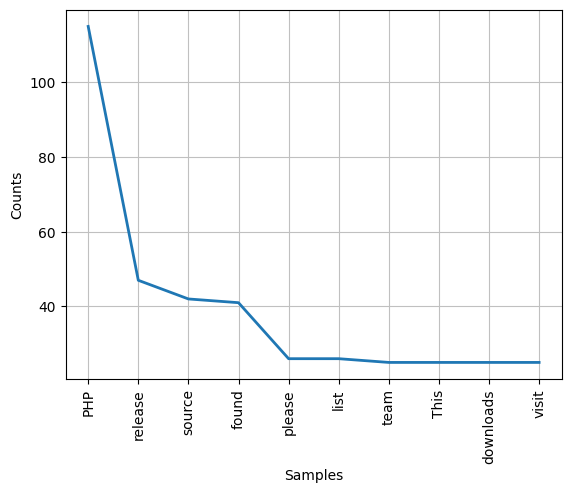

In [ ]:
#code block 6
#print and plot the 10 tokens with  high frequency
for key,val in freq.items():
    print (str(key) + ':' + str(val))
freq.plot(10,cumulative=False)

This code prints and visualizes the 10 most frequent tokens from the clean_tokens list.

The for key, val in freq.items() loop iterates through the frequency distribution (freq) and prints each token (key) along with its frequency (val).

freq.plot(10, cumulative=False) plots a bar chart of the 10 most frequent tokens (not cumulative), showing their counts. The cumulative=False option ensures that the plot shows the exact frequency of each token without accumulating previous counts.

###**PIE CHART REPRESENTATION**

([<matplotlib.patches.Wedge at 0x7b4717e7e450>,
 [Text(0.6750915207908158, 0.8684765043202629, 'PHP'),
  Text(-0.6402094825531639, 0.8945008767178544, 'release'),
  Text(-1.0670674338261084, 0.2671461990516878, 'source'),
  Text(-1.0081770045210185, -0.4399762806732046, 'found'),
  Text(-0.6472677224032264, -0.8894068222894065, 'please'),
  Text(-0.23749328252881607, -1.0740563024132803, 'list'),
  Text(0.20338273265211262, -1.081034441661763, 'team'),
  Text(0.60432527527387, -0.9191251066449884, 'This'),
  Text(0.9118872989336183, -0.6151922902991794, 'downloads'),
  Text(1.0785442294368752, -0.2161997806391517, 'visit')])

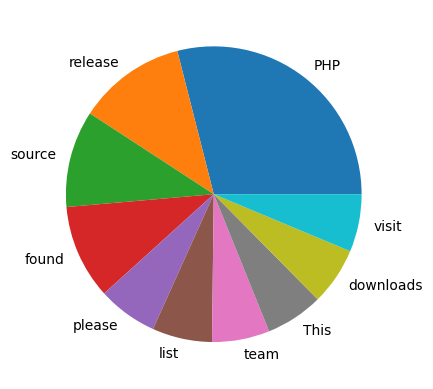

In [ ]:
#code block 7
#pie chart representation for the 10 high frequency tokens from spaces web apge
import matplotlib.pyplot as plt
a = dict(freq)
sort = sorted(a, key=a.get,reverse=True)
count =0
b = {}
for i in sort:
    b[i] = a[i]
    count+= 1
    if count == 10:
       break
x = b.keys()
v = b.values()
plt.pie(v,labels=x)

This code creates a pie chart to show the top 10 most frequent tokens (words) from the SpaceX webpage. It sorts the tokens by their frequency, selects the 10 most frequent ones, and then uses matplotlib to create a pie chart with these tokens as labels and their frequencies as values. This chart visually represents how often these top 10 tokens appear.

###**BAR GRAPH REPRESENTATION**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'NLTK': 2, 'for': 2, '.': 2, 'is': 1, 'a': 1, 'powerful': 1, 'library': 1, 'natural': 1, 'language': 1, 'processing': 1, 'provides': 1, 'tools': 1, 'text': 1, 'analysis': 1})


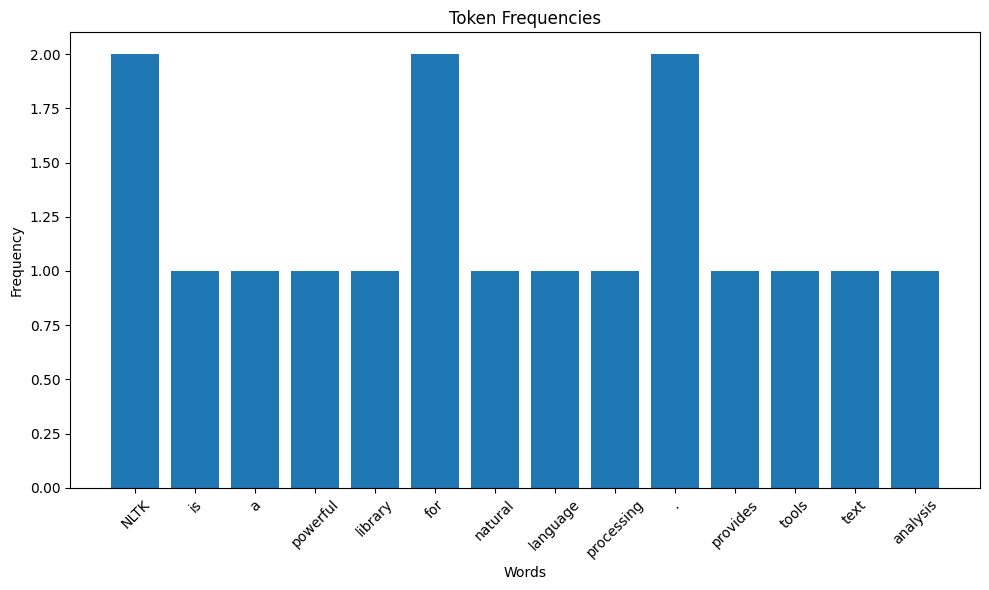

In [ ]:
#EXAMPLE

import nltk
nltk.download('punkt')  # Download necessary data
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Sample text
text = "NLTK is a powerful library for natural language processing. NLTK provides tools for text analysis."

# Tokenize the text
tokens = word_tokenize(text)

# Count word frequencies
word_counts = Counter(tokens)
print(word_counts)
# Separate words and their frequencies
words = list(word_counts.keys())
frequencies = list(word_counts.values())

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Token Frequencies')
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

This code takes a sample text, splits it into individual words (tokens), and counts how many times each word appears. It then creates a bar chart to visualize the frequency of each word, with the words on the x-axis and their counts on the y-axis. The graph is displayed using matplotlib.

# **Question 4**
##Work on **code block 2** and use the same code concept below to parse data from any live website that talk about SpaceX Technologies and plot any graph for those tokens of your own choice which is not given above.
####Note: Please keep in mind that do not put all code in one block split in a fashionable way.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


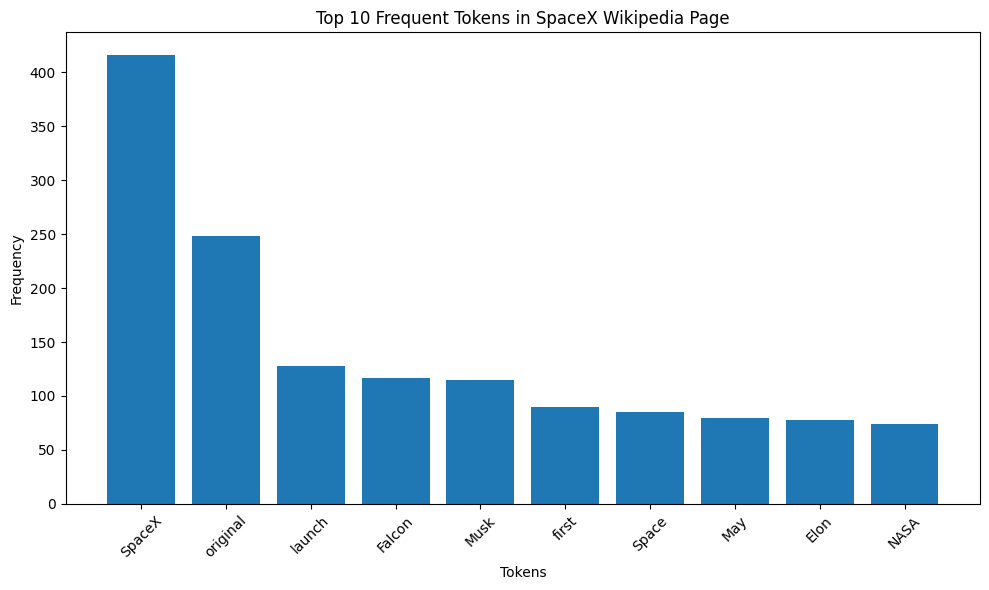

In [10]:
# Install necessary libraries
!pip install requests beautifulsoup4 nltk matplotlib

# Import libraries
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Scrape data from SpaceX Wikipedia page
url = 'https://en.wikipedia.org/wiki/SpaceX'
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(strip=True)

# Step 2: Tokenize the text
tokens = word_tokenize(text)

# Step 3: Remove stopwords and count frequencies
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]
word_counts = Counter(filtered_tokens)

# Step 4: Plot a bar chart for the 10 most frequent tokens
top_tokens = word_counts.most_common(10)
words, frequencies = zip(*top_tokens)

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(words, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Tokens in SpaceX Wikipedia Page')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Install Required Libraries:** The code installs requests, beautifulsoup4, nltk, and matplotlib for web scraping, text processing, and plotting.

**Scrape SpaceX Wikipedia Page:** It fetches the HTML content of the SpaceX Wikipedia page using requests and parses it using BeautifulSoup.

**Tokenize Text:** The page content is split into individual words (tokens) using nltk.word_tokenize().

**Remove Stopwords:** It filters out common words (e.g., "the", "and") that don't add meaningful information, using nltk.stopwords.

**Count Word Frequencies:** The remaining tokens are counted for their frequency using Counter() from the collections module.

**Generate Bar Chart:** The code then plots a bar chart of the top 10 most frequent tokens using matplotlib.